In [1]:
import json
import numpy as np
import plotly.plotly as py
import matplotlib as mpl
from matplotlib import cycler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import os
import glob2
import re
from IPython.display import display
import h5py
import numpy as np
%matplotlib inline
import sys
import random
from functools import partial
import matplotlib.patches as mpatches
import matplotlib

/Users/dieumynguyen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [263]:
# !rm -r experiments/*
# !python main.py

Creating thread for 

Experiment 1/1 - iteration 0 --- Queen Concentration: 0.15 -- Worker Concentration: 0.05 -- Diffussion Coefficient: 0.3 -- Worker Bee Threshold: 0.1
Timestep 80/80

In [2]:
!rm step1_combine_replicates/combined_replicates/*
!python step1_combine_replicates/combine_replicates.py

['experiment0_Q0.15_W0.05_D0.3_T0.1_wb0']
Combining all replicates of set: experiment0_Q0.15_W0.05_D0.3_T0.1_wb0


In [18]:
!rm step4_position_data_scenting/position_data/*
!python step4_position_data_scenting/get_position.py

Getting position data for: Q0.15_W0.05_D0.3_T0.1_wb0.json


In [19]:
root_dir = "experiments/12M_10D-11H_48M_27S/experiment0_Q0.15_W0.05_D0.3_T0.1_wb0/data/concentration_maps/"
file = root_dir + "concentration_map_history_024.h5"


In [20]:
f = h5py.File(file, "r")

In [21]:
f.keys()

KeysView(<HDF5 file "concentration_map_history_024.h5" (mode r)>)

In [22]:
dset = f.get('concentration_map_history')

In [23]:
dset.shape

(601, 601)

In [24]:
t_0 = np.array(dset)

In [25]:
np.min(t_0)

7.646009845677102e-08

Find max over all timesteps

In [26]:
# All concentration matrices file names
filenames = glob2.glob(root_dir + "*")
len(filenames)

320

In [27]:
max_concentration = 0
for file in filenames:
    f = h5py.File(file, "r")
    dset = f.get("concentration_map_history")
    dset_np = np.array(dset)
    if np.max(dset_np) > max_concentration:
        max_concentration = np.max(dset_np)
        # print(max_concentration, file)
max_concentration

3.612984028335533

In [28]:
# # Random xy
# x = partial(random.sample, range(10, 600), 10)
# x_pos = [x() for _ in range(80)]
# y = partial(random.sample, range(10, 600), 10)
# y_pos = [y() for _ in range(80)]
# x_pos[0], y_pos[0]

/Users/dieumynguyen/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2400: UserWarning:

Saw kwargs ['mec', 'markeredgecolor'] which are all aliases for 'markeredgecolor'.  Kept value from 'markeredgecolor'



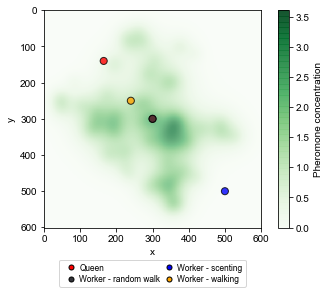

In [29]:
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

# Example single plot
plt.imshow(t_0, vmin=0, 
           vmax=max_concentration, 
           interpolation='nearest', 
           cmap=plt.cm.get_cmap('Greens'),
           alpha = 0.7)
cbar = plt.colorbar()
cbar.set_label('Pheromone concentration', rotation=90)

colors = ["red", "#323339", "blue", "orange"]
plt.scatter([300, 300, 500, 240, 165], [300, 300, 500, 250, 140], c=colors, s=50,
           alpha=0.8, edgecolors='black')

texts = ["Queen", "Worker - random walk", "Worker - scenting", "Worker - walking"]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            markeredgecolor="black",
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
plt.legend(handles=patches, bbox_to_anchor=(0.5, -0.21), 
           loc='center', ncol=2, numpoints=1, labelspacing=0.3,
           fontsize='small', fancybox="True",
           handletextpad=0, columnspacing=0)
plt.xlabel("x")
plt.ylabel("y")

# plt.title("t = {}/{}".format(file[-4:-3], len(x_pos)))
plt.show()

In [30]:
# Reading in position_data to get positions of bees
# For 1 timestep and x number of bees:
position_data_path = "step4_position_data_scenting/position_data/Q0.15_W0.05_D0.3_T0.1_wb0.json"
with open(position_data_path, "r") as f:
    pos_data = json.load(f)


In [31]:
def convert_xy_to_index(input_coord, input_low, input_high,
                        output_low, output_high):
    index = ((input_coord - input_low) / (input_high - input_low)) * (output_high - output_low) + output_low
    return index

In [32]:
x_pos = [[] for i in range(320)]  # len of 80 lists, each list has 10 bees
y_pos = [[] for i in range(320)]
scenting = [[] for i in range(320)] # scenting = T
# walking = [[] for i in range(80)]  # found_queen_direction = T and scenting = F

for i, file in enumerate(filenames): # Each timestep, i
    for worker_i in range(1, 101):
        x = pos_data[0]['worker_{}'.format(worker_i)][i]['x']
        x = convert_xy_to_index(x, -3, 3, 0, 600)
        x_pos[i].append(x)
        
        y = pos_data[0]['worker_{}'.format(worker_i)][i]['y']
        y = convert_xy_to_index(y, -3, 3, 0, 600)
        y_pos[i].append(y)
        
        scent = pos_data[0]['worker_{}'.format(worker_i)][i]['scenting']
        found_queen_dir = pos_data[0]['worker_{}'.format(worker_i)][i]['found_queen_direction']
        if scent == True:
            scenting[i].append("blue")
        else:
            if found_queen_dir == True:
                scenting[i].append("orange")
            else: 
                scenting[i].append("#323339")        

In [33]:
# Animation for all heatmaps
my_dpi=200

for i, file in enumerate(filenames):
#     print("Saving img at t = {}".format(i))
    
    # print(file[44:44+24])
    fig = plt.figure(dpi=my_dpi)
    
    # Read h5 data file
    f = h5py.File(file, "r")
    dset = f.get("concentration_map_history")
    dset_np = np.array(dset)
    
    # Plot heatmap and scatter
    plt.imshow(dset_np, vmin=0, vmax=max_concentration, interpolation='nearest', cmap="Greens")
    cbar = plt.colorbar()
    cbar.set_label('Pheromone concentration', rotation=90)

    # Get bee positions
    plt.scatter([300], [300], c="red", s=80, edgecolors='black') # Queen
    # Color workers based on behavior
    plt.scatter(x_pos[i], y_pos[i], color=scenting[i], s=30,
               alpha=0.8, edgecolors='black')
    
    colors = ["red", "#323339", "blue", "orange"]
    texts = ["Queen", "Worker - random walk", "Worker - scenting", "Worker - searching"]
    patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
                 markeredgecolor="black", label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
    plt.legend(handles=patches, bbox_to_anchor=(0.5, -0.22), 
               loc='center', ncol=2, numpoints=1, labelspacing=0.3,
               fontsize='small', fancybox="True",
               handletextpad=0, columnspacing=0)

    # Add titles (main and on axis)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("{} \nDecay rate = 3.0 \nt = {}/{}".format(file[44:-57], i+1, len(x_pos)))
    plt.ylim(0, 600)
    plt.xlim(0, 600)
    
    # Save image of each timestep
    filename='test_converging3/test_converging_t{}.png'.format(str(i+1).zfill(3))
    plt.savefig(filename, dpi=my_dpi, bbox_inches='tight')
    
    plt.close()

/Users/dieumynguyen/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2400: UserWarning:

Saw kwargs ['mec', 'markeredgecolor'] which are all aliases for 'markeredgecolor'.  Kept value from 'markeredgecolor'



In [45]:
import cv2
import glob2

all_img_paths = np.sort(glob2.glob("test_imgs/*.png"))
all_imgs = np.array([cv2.imread(img) for img in all_img_paths])

def imgs2vid(imgs, outpath, fps=12):
    height, width, layers = imgs[0].shape
    fourcc = cv2.VideoWriter_fourcc("m", "p", "4", "v")
    video = cv2.VideoWriter(outpath, fourcc, fps, (width, height), True)
    
    for img in imgs:
        video.write(img)
        
    cv2.destroyAllWindows()
    video.release()

imgs2vid(all_imgs, "test.mp4")

In [34]:
!convert -delay 25 test_converging3/test_converging*.png test_converging3/Q0.15_W0.05_D0.3_T0.1_wb0.mp4


^C
